In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
@np.vectorize
def NumericalDiff(f: Callable[[float], float], x:float , h: float = 0.01, order: float = 1, h_order: int = 2, type: str = 'central'):
    if order == 1:
        if h_order == 2:
            if type == 'central':
                return (f(x + h) - f(x - h)) / (2 * h)
            if type == 'backward':
                return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)
            if type == 'forward':
                return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))/(2 * h)
        elif h_order == 4:
            if type == 'central':
                return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h))/(12 * h)
    elif order == 2:
        if h_order == 2:
            if type == 'central':
                return (f(x + h) - 2 * f(x) + f(x - h))/(h ** 2)
        elif h_order == 4:
            if type == 'central':
                return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * np.power(h, 2))

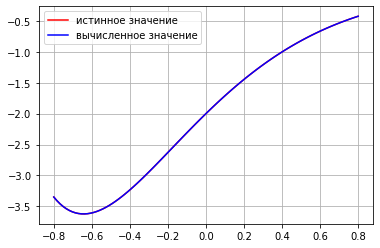

<Figure size 36000x36000 with 0 Axes>

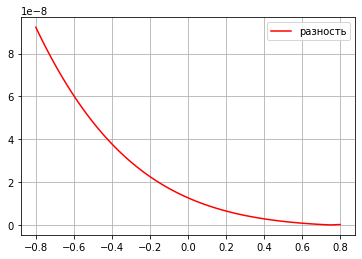

<Figure size 36000x36000 with 0 Axes>

In [3]:
X = np.linspace(-0.8, 0.8, 100)
f = lambda x: np.exp(-2*x)*np.cos(x)
true_sol = -2 * np.exp(-2 * X) * np.cos(X) - np.exp(-2 * X) * np.sin(X)
calc_sol = NumericalDiff(f, X, order=1, h_order=4)

plt.plot(X, true_sol, color='red', label='истинное значение')
plt.plot(X, calc_sol, color='blue', label='вычисленное значение')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, abs(calc_sol - true_sol), color='red', label='разность')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [15]:
a = -0.8
b = 0.8
hs = {}
errs = {}
for order in [1, 2]:
    if order == 1:
        hs[order] = {}
        errs[order] = {}
        for h_order in [2, 4]:
            hs[order][h_order] = []
            errs[order][h_order] = [] 
            for s in range(-3, 0, 1):
                h = 10 ** s
                X = np.arange(a,b+h,h)
                true_sol = -2 * np.exp(-2 * X) * np.cos(X) - np.exp(-2 * X) * np.sin(X)
                calc_sol = NumericalDiff(f=f, x=X, h=h, h_order=h_order)
                err = np.max(np.abs(calc_sol - true_sol) / np.abs(true_sol))
#                 err = np.max(np.abs(calc_sol - true_sol))
                hs[order][h_order].append(np.log(h))
                errs[order][h_order].append(np.log(err))
    elif order == 2:
        hs[order] = {}
        errs[order] = {}
        for h_order in [2, 4]:
            hs[order][h_order] = []
            errs[order][h_order] = [] 
            for s in range(-3, 0, 1):
                h = 10 ** s
                X = np.arange(a,b+h-,h)
                true_sol = (4 * np.sin(X) + 3 * np.cos(X)) * np.exp(-2 * X)
                calc_sol = NumericalDiff(f=f, x=X, h=h, order=order, h_order=h_order)
                err = np.max(np.abs(calc_sol - true_sol) / np.abs(true_sol))
#                 err = np.max(np.abs(calc_sol - true_sol))
                hs[order][h_order].append(np.log(h))
                errs[order][h_order].append(np.log(err))

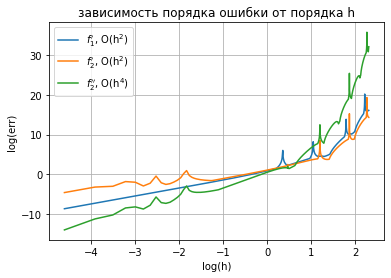

<Figure size 72000x72000 with 0 Axes>

In [16]:
plt.plot(hs[1][2], errs[1][2], label="$f_1'$, O(h$^2$)")
plt.plot(hs[2][2], errs[2][2], label="$f_2'$, O(h$^2$)")
plt.plot(hs[2][4], errs[2][4], label="$f_2''$, O(h$^4$)")
plt.grid()
plt.legend()
plt.title('зависимость порядка ошибки от порядка h')
plt.xlabel('log(h)')
plt.ylabel('log(err)')
plt.figure(figsize=(1000, 1000))
plt.show()